In [300]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_path = "prof.jpg"
img = Image.open(img_path)
img_array = np.array(img)

height, width, _ = img_array.shape
print(f"Image dimensions (Height, Width): ({height}, {width})")

Image dimensions (Height, Width): (904, 1280)


In [301]:
img_array

array([[[  0, 161, 207],
        [  1, 162, 208],
        [  0, 161, 207],
        ...,
        [ 20,   1,  82],
        [ 19,   0,  81],
        [ 19,   0,  81]],

       [[  1, 159, 206],
        [  0, 161, 207],
        [  0, 160, 206],
        ...,
        [ 20,   1,  82],
        [ 19,   0,  81],
        [ 19,   0,  81]],

       [[ 12, 169, 214],
        [ 10, 168, 213],
        [  9, 167, 212],
        ...,
        [ 20,   1,  82],
        [ 19,   0,  81],
        [ 19,   0,  81]],

       ...,

       [[ 22,   0,  83],
        [ 22,   0,  83],
        [ 22,   0,  83],
        ...,
        [ 23,  15,  92],
        [ 23,  15,  92],
        [ 23,  15,  92]],

       [[ 22,   0,  83],
        [ 22,   0,  83],
        [ 22,   0,  83],
        ...,
        [ 23,  15,  92],
        [ 23,  15,  92],
        [ 23,  15,  92]],

       [[ 22,   0,  83],
        [ 22,   0,  83],
        [ 22,   0,  83],
        ...,
        [ 23,  15,  92],
        [ 23,  15,  92],
        [ 23,  15,  92]]

In [302]:
img_array.shape

(904, 1280, 3)

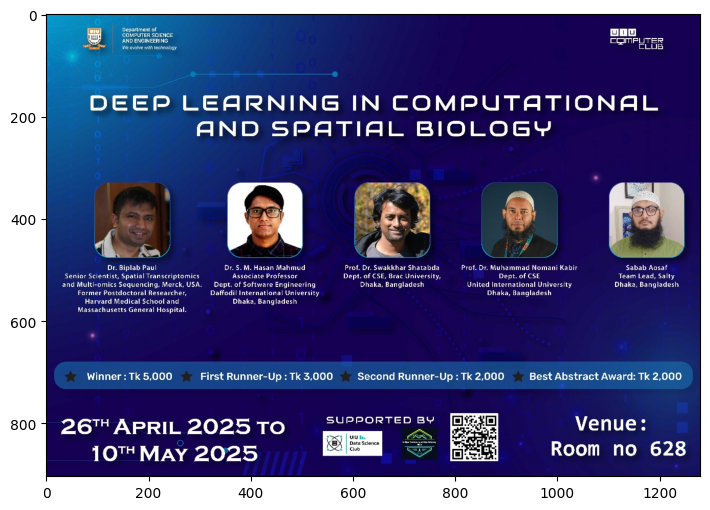

In [303]:
plt.figure(figsize=(10,6))
plt.imshow(img_array)
plt.show()

In [304]:
heatmap_data = np.zeros((height, width))
heatmap_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(904, 1280))

In [305]:
heatmap_data[330:480, 90:250] = 300 #biplab
heatmap_data[330:480, 350:500] = 200 #hasan
heatmap_data[330:480, 600:750] = 600 #swakhar
heatmap_data[330:480, 850:1000] = 400 #nomani
heatmap_data[330:480, 1100:1250] = 100 #shabab

# heatmap_data[y1:y2, x1:x2] = ppower

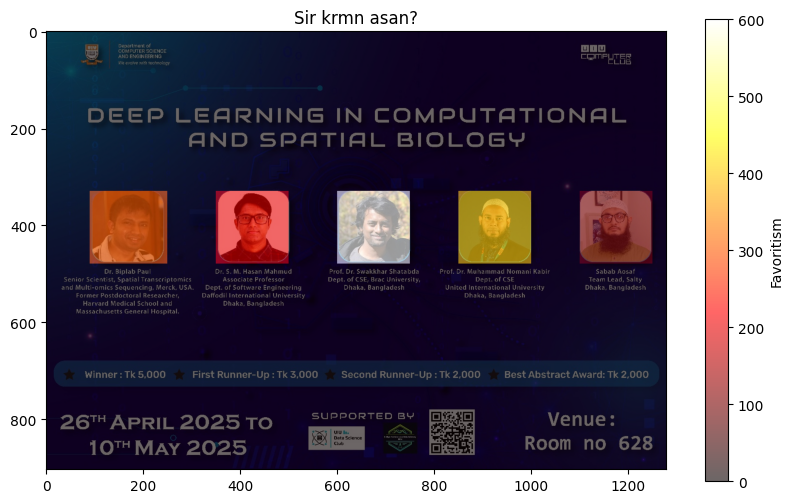

In [306]:
plt.figure(figsize=(10,6))

plt.imshow(img_array)

plt.imshow(heatmap_data, cmap='hot', alpha=0.6)

plt.colorbar(label = "Favoritism")
plt.title("Sir krmn asan?")
# plt.axis('off')
plt.show()

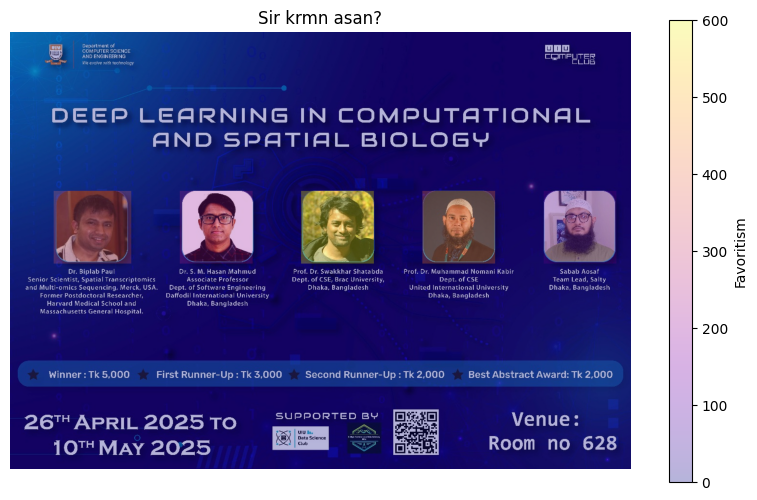

In [307]:
plt.figure(figsize=(10,6))

plt.imshow(img_array)

plt.imshow(heatmap_data, cmap='plasma', alpha=0.3)

plt.colorbar(label = "Favoritism")
plt.title("Sir krmn asan?")
plt.axis('off')
plt.show()

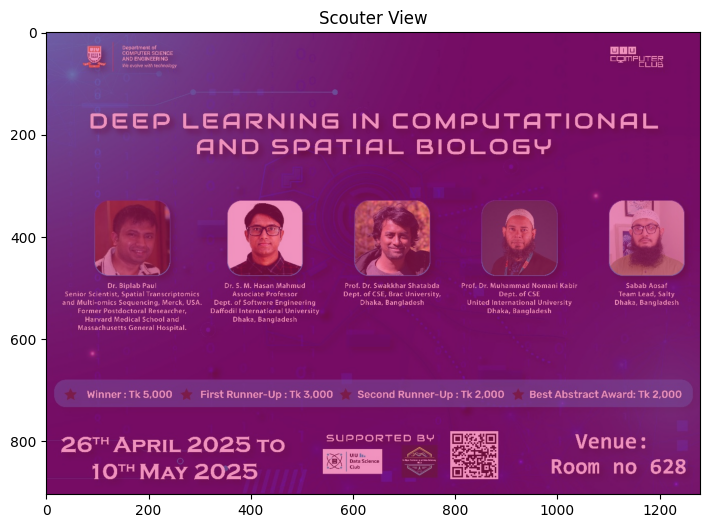

In [308]:
overlay_color = np.array([225, 25, 120, 120], dtype=np.uint8)

if img.mode != 'RGBA':
    img = img.convert("RGBA")

overlay = Image.new("RGBA", img.size, tuple(overlay_color))
scouter_img = Image.alpha_composite(img, overlay)

scouter_arr = np.array(scouter_img)

plt.figure(figsize=(10,6))
plt.imshow(scouter_arr)
plt.title("Scouter View")
plt.show()

In [309]:
# power_map = np.zeros((height, width))

# for (x1, y1, x2, y2), power in zip(positions, power_levels):
#     power_map[y1:y2, x1:x2] = power

masked_map = np.ma.masked_where(heatmap_data == 0, heatmap_data)
masked_map

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

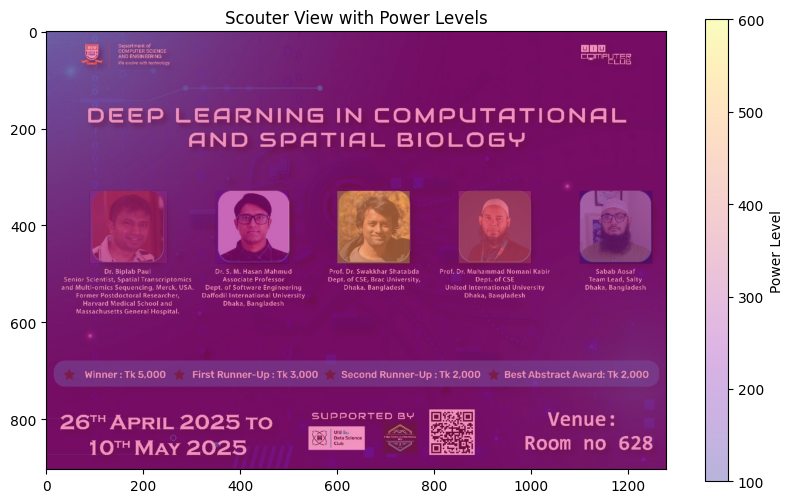

In [310]:
plt.figure(figsize=(10,6))
plt.imshow(scouter_arr)
plt.imshow(masked_map, cmap="plasma", alpha=0.3)
plt.colorbar(label="Power Level")
plt.title("Scouter View with Power Levels")
plt.show()

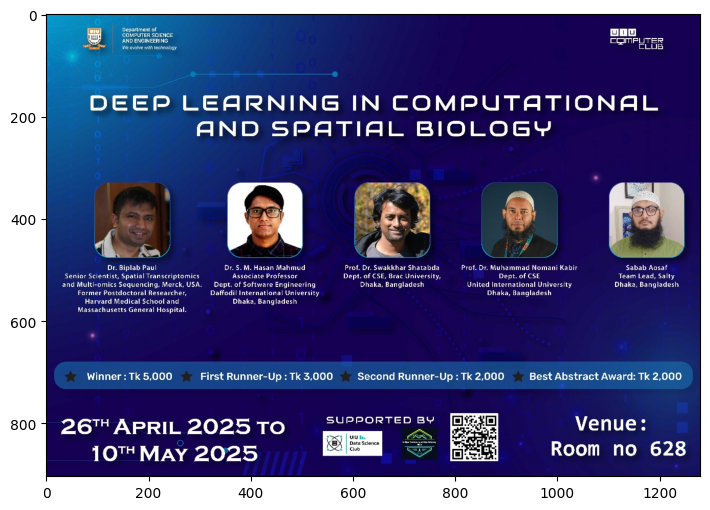

In [311]:
plt.figure(figsize=(10,6))
plt.imshow(img_array)
plt.show()

In [312]:
height, width

(904, 1280)

In [313]:
heatmap_data = np.zeros((height,width))
heatmap_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(904, 1280))

In [314]:
heatmap_data[20:80, 65:260] = 300
heatmap_data[20:80, 1100:1210] = 100
heatmap_data[815:865, 540:660] = 700
heatmap_data[810:870, 690:765] = 69

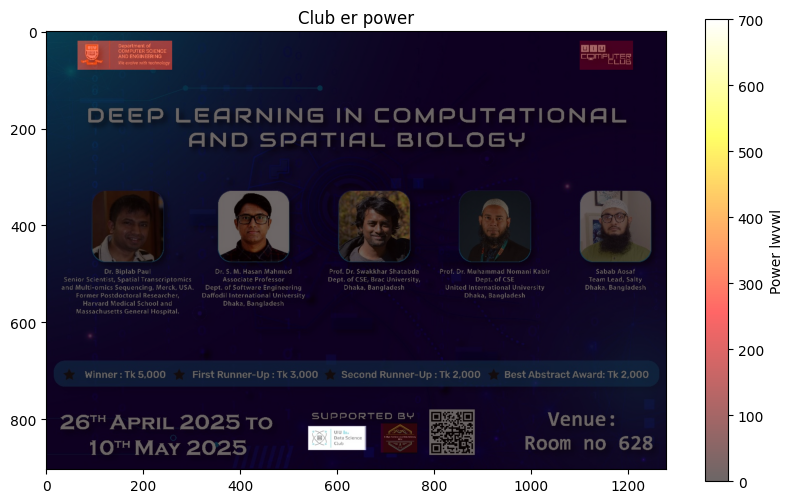

In [315]:
plt.figure(figsize=(10,6))
plt.imshow(img_array)
plt.imshow(heatmap_data, cmap="hot", alpha=0.6)


plt.colorbar(label = 'Power lwvwl')
plt.title("Club er power")
plt.show()

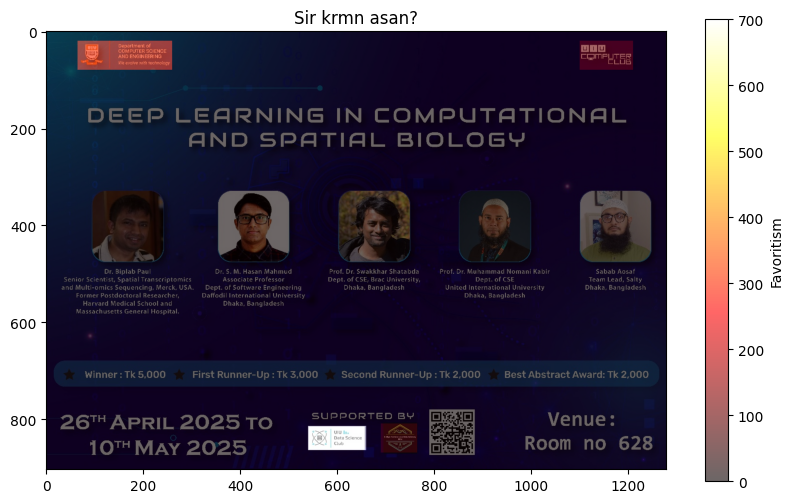

In [316]:
plt.figure(figsize=(10,6))

plt.imshow(img_array)

plt.imshow(heatmap_data, cmap='hot', alpha=0.6)

plt.colorbar(label = "Favoritism")
plt.title("Sir krmn asan?")
# plt.axis('off')
plt.show()

In [317]:
import pandas as pd

df = pd.read_csv('Meteorite_Landings.csv')
df.head() 

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [319]:
df.isnull

<bound method DataFrame.isnull of              name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLoc

In [320]:
df.shape

(45716, 10)

In [ ]:
df = df.dropna(axis=0, subset=["reclat", "reclong", "year"])
df.shape

(38223, 10)

In [323]:
df= df[(df.reclat != 0) & (df.reclong != 0)]
df.shape

(31813, 10)